Loading the banking data
- Background and first impressions about the data
 - The data is related with direct marketing campaigns of a Portuguese banking institution.
 - I got two datasets which had some overlapping features and some of the features were different.
 - As the goal was to understand the data, i combined them both to get a better perspective on the results and features affecting the result of this campaign.
  

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("/content/bank-full (1).xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no


Data description
- **Columns in the dataset**
 - Age: Age of the customer (integer)
 - Job: Job title of the customer (categorical)
 - Marital: Marital status of the customer (categorical)
 - Education: Education level of the customer (categorical)
 - Default: has credit in default? (categorical)
 - Balance: average yearly balance (integer)
 - Housing: has a housing loan? (categorical)
 - Loan: has personal loan? (categorical)
 - Contact: contact communication type (categorical)
 - Day_of_week: last contact day of the week (integer)
 -  Day: Date of month of contact (integer)
 - Month: last contact month of year (categorical)
 - Duration: last contact duration, in seconds
   (integer)
 -  Campaign: number of contacts performed during this campaign and for this client (integer)
 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (integer)
 - Previous: number of contacts performed before this campaign and for this client (integer)
 - Poutcome: outcome of the previous marketing campaign (categorical)
 - Y: has the client subscribed a term deposit? (categorical)
  - emp.var.rate: Employment variation rate (float)
 - cons.price.idx: Consumer price index (float)
 - cons.conf.idx: Consumer confidence index (float)

- Average age of people - 40 - 41
- Average balance in their account - 1362
- Average duration of campaign - 258 seconds
- Average number of days between current campaign and - last campaign (pdays) - 20 - 21 days

In [43]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,86399.000000,45211.000000,45211.000000,86399.000000,86399.000000,86399.000000,86399.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.501372,1362.272058,15.806419,258.198058,2.670286,20.681061,0.386127,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.534861,3044.765829,8.322476,258.341171,2.947825,75.269141,1.713060,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,-8019.000000,1.000000,-1.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##Data information
overlapping columns after combining are having lots of null values that shall be removed to get better results
- null values are present in
 - balance
 - day
 -day_of_week
 -emp.var.rate
 -cons.price.idx
 -cons.conf.idx
  -euribor3m
 -nr.employed   
- There is also "unknown" and "non-existent" in poutcomes that convers 80 percent of the data.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             86399 non-null  int64  
 1   job             86399 non-null  object 
 2   marital         86399 non-null  object 
 3   education       86399 non-null  object 
 4   default         86399 non-null  object 
 5   balance         45211 non-null  float64
 6   housing         86399 non-null  object 
 7   loan            86399 non-null  object 
 8   contact         86399 non-null  object 
 9   day             45211 non-null  float64
 10  month           86399 non-null  object 
 11  day_of_week     41188 non-null  object 
 12  duration        86399 non-null  int64  
 13  campaign        86399 non-null  int64  
 14  pdays           86399 non-null  int64  
 15  previous        86399 non-null  int64  
 16  poutcome        86399 non-null  object 
 17  emp.var.rate    41188 non-null 

##Calculating null values in the dataset

In [45]:
nan_values = df.isna().sum()
print("NaN values in each column:")
print(nan_values)

NaN values in each column:
age                   0
job                   0
marital               0
education             0
default               0
balance           41188
housing               0
loan                  0
contact               0
day               41188
month                 0
day_of_week       45211
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      45211
cons.price.idx    45211
cons.conf.idx     45211
euribor3m         45211
nr.employed       45211
y                     0
dtype: int64


##Removing columns with NaN values

In [46]:
threshold = 40000

# Drop columns with more than threshold NaN values
df_cleaned = df.dropna(axis=1, thresh=len(df) - threshold)
df_cleaned.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no


Combining "unknown" and "nonexistent" as thry mean the same

In [47]:
# Replace 'nonexistent' with 'unknown' in the 'poutcome' column
df['poutcome'] = df['poutcome'].replace('nonexistent', 'unknown')

# Verify the changes
poutcome_counts_after_replace = df['poutcome'].value_counts()
print(poutcome_counts_after_replace)

unknown    72522
failure     9153
success     2884
other       1840
Name: poutcome, dtype: int64


##Checking outliers by plotting different features
1) plotted age against duration ( found 2 outliers)

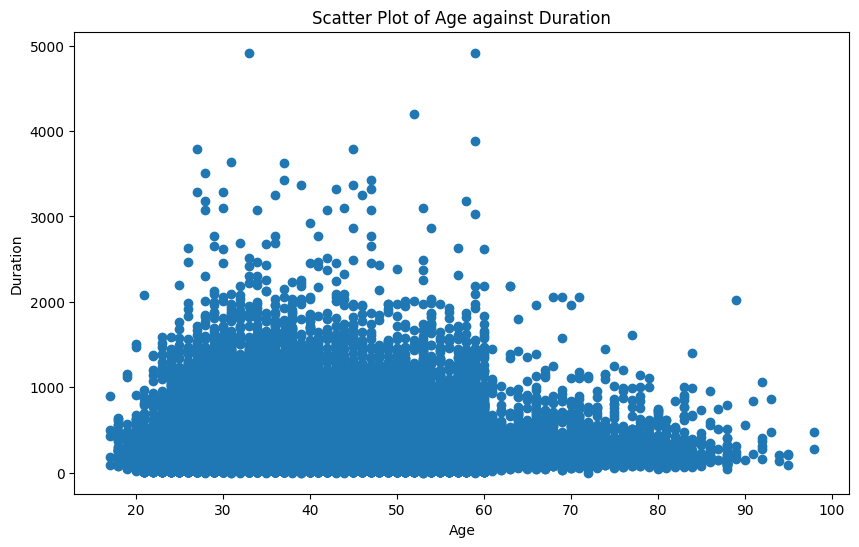

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['duration'])
plt.title('Scatter Plot of Age against Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

#Removing outlier in duration using z score

In [49]:
from scipy.stats import zscore
# Calculate the z-scores for the 'duration' column
df['duration_zscore'] = zscore(df['duration'])

# Define a threshold (e.g., 3) for considering a data point as an outlier
zscore_threshold = 8

# Filter out rows where the absolute z-score is greater than the threshold
df_no_outliers = df[abs(df['duration_zscore']) <= zscore_threshold]

# Drop the temporary z-score column
df_no_outliers = df_no_outliers.drop(columns=['duration_zscore'])

# Display the result
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (86399, 24)
DataFrame shape after removing outliers: (86335, 23)


In [50]:
df = df_no_outliers

#Values after removing the outliers

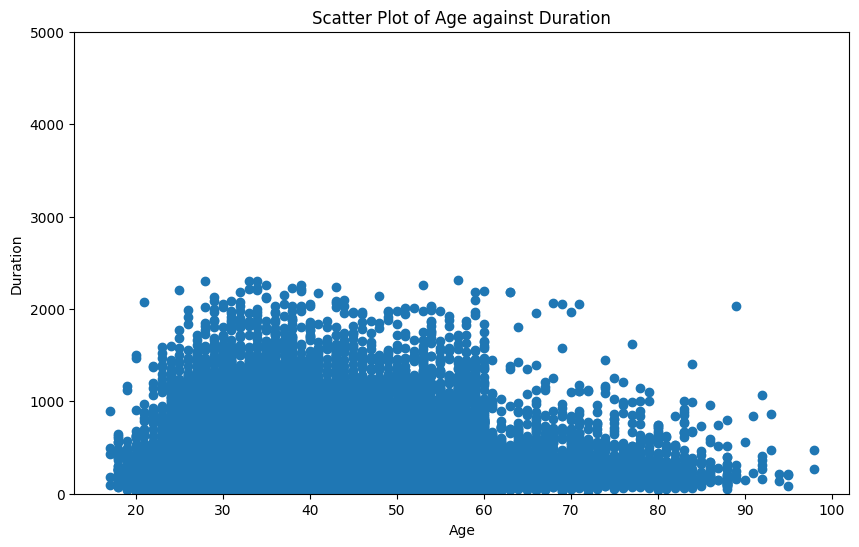

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['age'], df_no_outliers['duration'])
plt.title('Scatter Plot of Age against Duration')
plt.xlabel('Age')
plt.ylabel('Duration')

# Set y-axis limits and ticks
plt.ylim(0, 5000)
plt.yticks(range(0, 5001, 1000))

plt.show()

#Plotting a scatter plot to check outliers in "pdays"

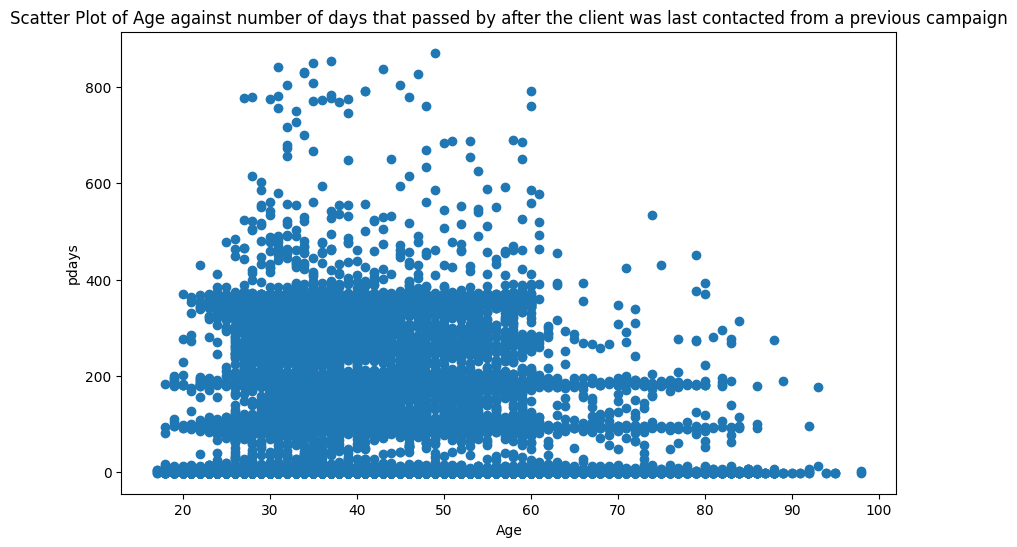

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['pdays'])
plt.title('Scatter Plot of Age against number of days that passed by after the client was last contacted from a previous campaign')
plt.xlabel('Age')
plt.ylabel('pdays')
plt.show()

Original DataFrame shape: (86335, 24)
DataFrame shape after removing outliers: (86097, 23)


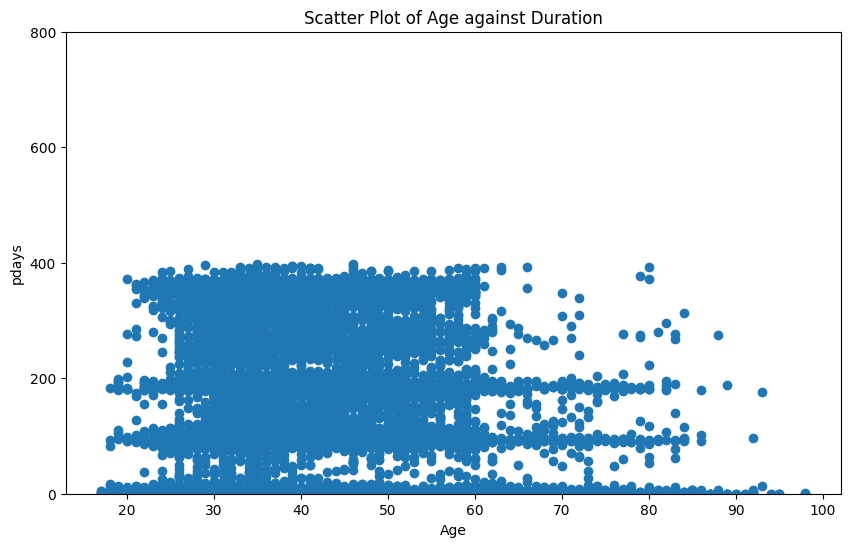

In [53]:

# Calculate the z-scores for the 'pdays' column
df['pdays_zscore'] = zscore(df['pdays'])

# Define a threshold (e.g., 3) for considering a data point as an outlier
zscore_threshold = 5

# Filter out rows where the absolute z-score is greater than the threshold
df_no_outliers = df[abs(df['pdays_zscore']) <= zscore_threshold]

# Drop the temporary z-score column
df_no_outliers = df_no_outliers.drop(columns=['pdays_zscore'])

# Display the result
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['age'], df_no_outliers['pdays'])
plt.title('Scatter Plot of Age against pdays')
plt.xlabel('Age')
plt.ylabel('pdays')

# Set y-axis limits and ticks
plt.ylim(0, 800)
plt.yticks(range(0, 801, 200))

plt.show()

In [54]:
df = df_no_outliers

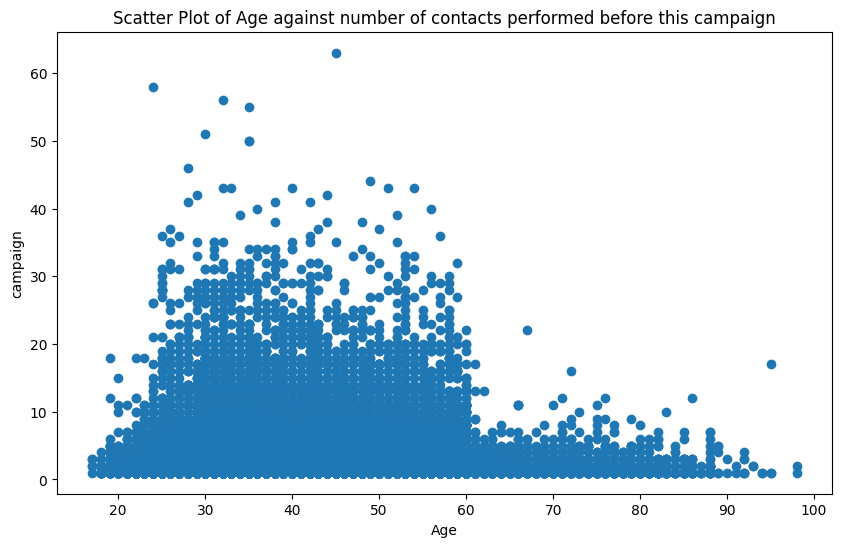

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['campaign'])
plt.title('Scatter Plot of Age against number of contacts performed before this campaign')
plt.xlabel('Age')
plt.ylabel('campaign')
plt.show()

Original DataFrame shape: (86097, 24)
DataFrame shape after removing outliers: (86074, 23)


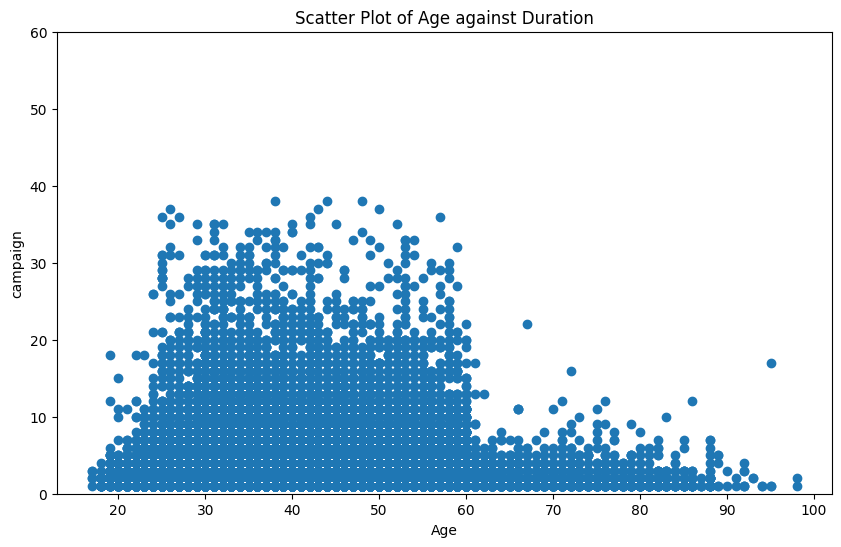

In [60]:

# Calculate the z-scores for the 'pdays' column
df['campaign_zscore'] = zscore(df['campaign'])

# Define a threshold (e.g., 3) for considering a data point as an outlier
zscore_threshold = 12

# Filter out rows where the absolute z-score is greater than the threshold
df_no_outliers = df[abs(df['campaign_zscore']) <= zscore_threshold]

# Drop the temporary z-score column
df_no_outliers = df_no_outliers.drop(columns=['campaign_zscore'])

# Display the result
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['age'], df_no_outliers['campaign'])
plt.title('Scatter Plot of Age against Campaign')
plt.xlabel('Age')
plt.ylabel('campaign')

# Set y-axis limits and ticks
plt.ylim(0, 60)
plt.yticks(range(0, 61, 10))

plt.show()

In [61]:
df = df_no_outliers

#Found outlier for number of contacts performed before this campaign

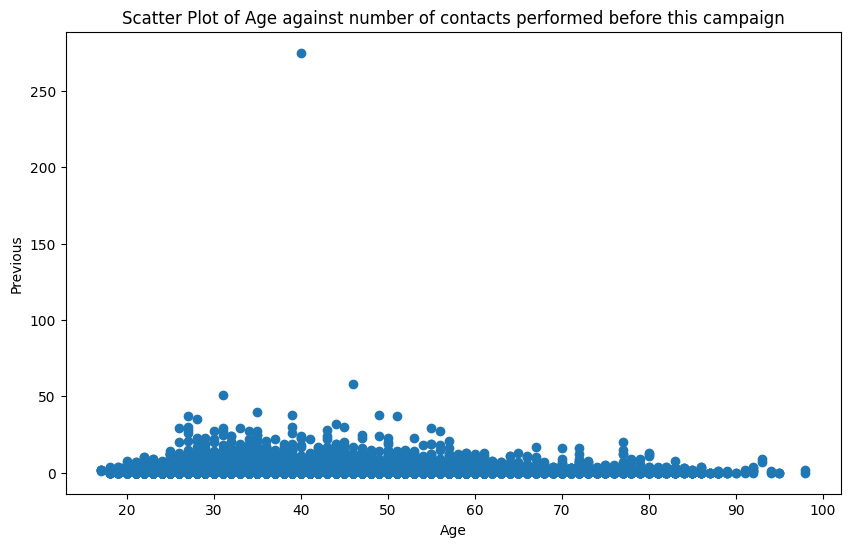

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['previous'])
plt.title('Scatter Plot of Age against number of contacts performed before this campaign')
plt.xlabel('Age')
plt.ylabel('Previous')

# Set y-axis ticks from 0 to 250 with a gap of 50
plt.yticks(range(0, 251, 50))

# Show the plot
plt.show()

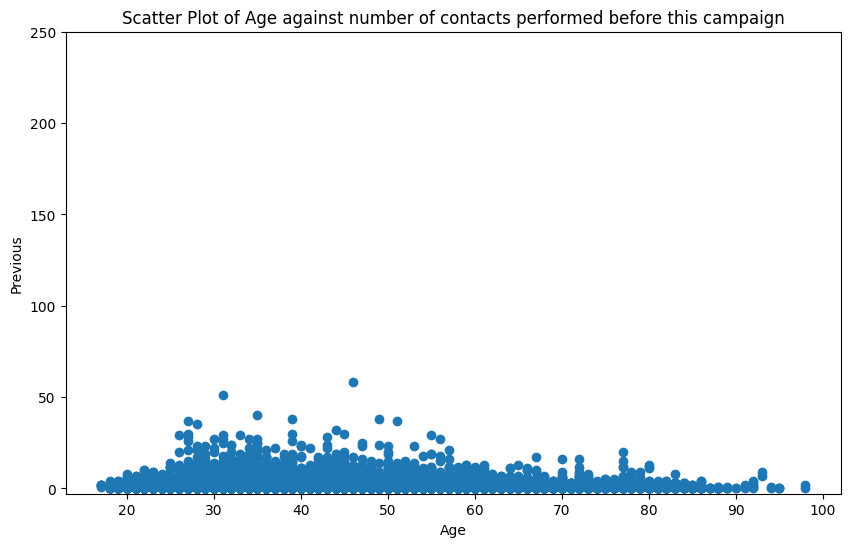

In [66]:
df.drop(df[df['previous'] > 250].index, inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['previous'])
plt.title('Scatter Plot of Age against number of contacts performed before this campaign')
plt.xlabel('Age')
plt.ylabel('Previous')

# Set y-axis ticks from 0 to 250 with a gap of 50
plt.yticks(range(0, 251, 50))

# Show the plot
plt.show()

- In this i am clubbing diverse categories to the relevant bracket in education
 - replaced basic.4y and basic.6y to Primary
 - replaced basic.9y to secondary
 - replaced professional.course to Tertiary

In [62]:
df['education'].replace({'primary': 'Primary', 'primary': 'Primary'}, inplace=True)
grouped_counts_education = df.groupby(['education', 'y']).size().reset_index(name='count')
print(grouped_counts_education)

              education    y  count
0               Primary   no  12093
1               Primary  yes   1193
2             Secondary   no  14049
3             Secondary  yes   1499
4            illiterate   no     14
5            illiterate  yes      4
6   professional.course   no   4643
7   professional.course  yes    593
8             secondary   no  20687
9             secondary  yes   2381
10             tertiary   no  21737
11             tertiary  yes   3606
12              unknown   no   3077
13              unknown  yes    498


In [63]:
df['education'].replace({'basic.9y': 'Secondary'}, inplace=True)
df['education'].replace({'professional.course': 'tertiary'}, inplace=True)
grouped_counts_education = df.groupby(['education', 'y']).size().reset_index(name='count')
print(grouped_counts_education)

     education    y  count
0      Primary   no  12093
1      Primary  yes   1193
2    Secondary   no  14049
3    Secondary  yes   1499
4   illiterate   no     14
5   illiterate  yes      4
6    secondary   no  20687
7    secondary  yes   2381
8     tertiary   no  26380
9     tertiary  yes   4199
10     unknown   no   3077
11     unknown  yes    498


In [64]:
df['education'].replace({'secondary': 'Secondary'}, inplace=True)
grouped_counts_education = df.groupby(['education', 'y']).size().reset_index(name='count')
print(grouped_counts_education)

    education    y  count
0     Primary   no  12093
1     Primary  yes   1193
2   Secondary   no  34736
3   Secondary  yes   3880
4  illiterate   no     14
5  illiterate  yes      4
6    tertiary   no  26380
7    tertiary  yes   4199
8     unknown   no   3077
9     unknown  yes    498


#Dropping "previous" as "previous" and "campaign" both have same meaning (as given in the source) and "campaign" seems to have more numerical values

In [67]:
df = df.drop('previous', axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,261,1,-1,unknown,NaN,NaN,NaN,NaN,NaN,no
1,44,technician,single,Secondary,no,29.0,yes,no,unknown,5.0,...,151,1,-1,unknown,NaN,NaN,NaN,NaN,NaN,no
2,33,entrepreneur,married,Secondary,no,2.0,yes,yes,unknown,5.0,...,76,1,-1,unknown,NaN,NaN,NaN,NaN,NaN,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,92,1,-1,unknown,NaN,NaN,NaN,NaN,NaN,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,198,1,-1,unknown,NaN,NaN,NaN,NaN,NaN,no


Now that we have removed the outliers and did some data processing. Now we can move forward to visualization and analysing the data.

The most important features are the previous outcome and the duration along with the type of communication, month of contact

##Analyzed the conversion rate by comparing the status of outcome from previous campaign and current status.

In [69]:
count_failure_yes = df[(df['poutcome'] == 'failure') & (df['y'] == 'yes')].shape[0]
count_unknown_yes = df[(df['poutcome'] == 'unknown') & (df['y'] == 'yes')].shape[0]
count_success_yes = df[(df['poutcome'] == 'success') & (df['y'] == 'yes')].shape[0]
print(f"Number of rows where poutcome is 'failure' and y is 'yes': {count_failure_yes}")
print(f"Number of rows where poutcome is 'unknown' and y is 'yes': {count_unknown_yes}")
print(f"Number of rows where poutcome is 'sucess' and y is 'yes': {count_success_yes}")

Number of rows where poutcome is 'failure' and y is 'yes': 1158
Number of rows where poutcome is 'unknown' and y is 'yes': 6490
Number of rows where poutcome is 'sucess' and y is 'yes': 1840


In [70]:
count_failure_no = df[(df['poutcome'] == 'failure') & (df['y'] == 'no')].shape[0]
count_unknown_no = df[(df['poutcome'] == 'unknown') & (df['y'] == 'no')].shape[0]
count_success_no = df[(df['poutcome'] == 'success') & (df['y'] == 'no')].shape[0]
print(f"Number of rows where poutcome is 'failure' and y is 'no': {count_failure_no}")
print(f"Number of rows where poutcome is 'unknown' and y is 'no': {count_unknown_no}")
print(f"Number of rows where poutcome is 'sucess' and y is 'no': {count_success_no}")

Number of rows where poutcome is 'failure' and y is 'no': 7853
Number of rows where poutcome is 'unknown' and y is 'no': 65944
Number of rows where poutcome is 'sucess' and y is 'no': 998


#plotting graph for previous outcomes and present response

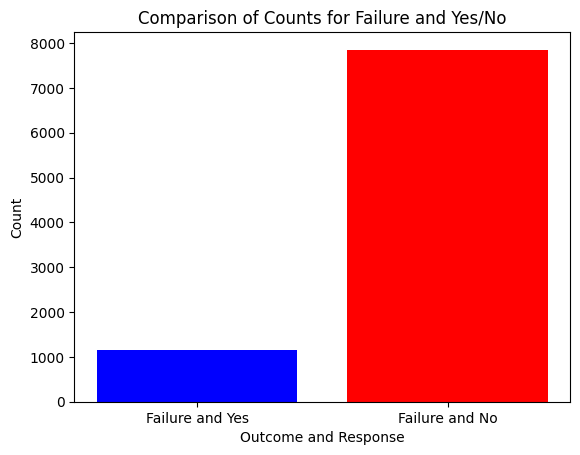

In [71]:
labels = ['Failure and Yes', 'Failure and No']
counts = [count_failure_yes, count_failure_no]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Comparison of Counts for Failure and Yes/No')
plt.xlabel('Outcome and Response')
plt.ylabel('Count')
plt.show()

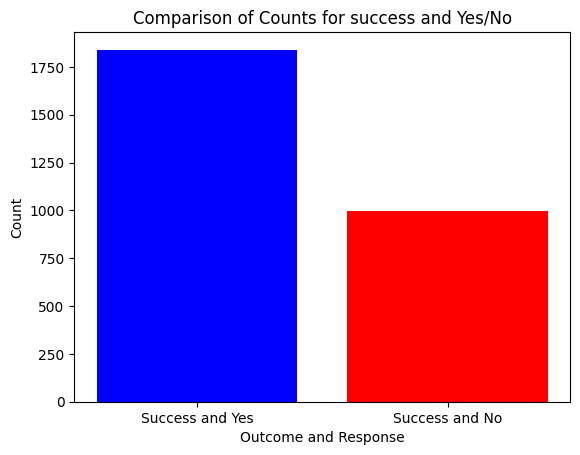

In [72]:
labels = ['Success and Yes', 'Success and No']
counts = [count_success_yes, count_success_no]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Comparison of Counts for success and Yes/No')
plt.xlabel('Outcome and Response')
plt.ylabel('Count')
plt.show()

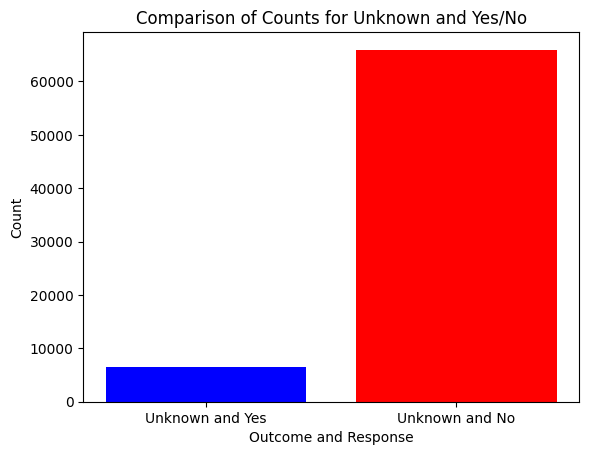

In [73]:
labels = ['Unknown and Yes', 'Unknown and No']
counts = [count_unknown_yes, count_unknown_no]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Comparison of Counts for Unknown and Yes/No')
plt.xlabel('Outcome and Response')
plt.ylabel('Count')
plt.show()

#calculating the conversion rates

In [74]:
# Count the number of rows for each combination of 'poutcome' and 'y'
count_failure_yes = df[(df['poutcome'] == 'failure') & (df['y'] == 'yes')].shape[0]
count_success_no = df[(df['poutcome'] == 'success') & (df['y'] == 'no')].shape[0]

# Total counts for 'poutcome' values
total_failure = df[df['poutcome'] == 'failure'].shape[0]
total_success = df[df['poutcome'] == 'success'].shape[0]

# Calculate the percentages
percentage_failure_yes = (count_failure_yes / total_failure) * 100
percentage_success_no = (count_success_no / total_success) * 100

# Print the results
print(f"Percentage of people who converted from 'failure' to 'yes': {percentage_failure_yes:.2f}%")
print(f"Percentage of people who converted from 'success' to 'no': {percentage_success_no:.2f}%")


Percentage of people who converted from 'failure' to 'yes': 12.85%
Percentage of people who converted from 'success' to 'no': 35.17%


In [75]:
# Count the number of rows for each combination of 'poutcome' and 'y'
count_success_yes = df[(df['poutcome'] == 'success') & (df['y'] == 'yes')].shape[0]
count_failure_no = df[(df['poutcome'] == 'failure') & (df['y'] == 'no')].shape[0]

# Total counts for 'poutcome' values
total_success = df[df['poutcome'] == 'success'].shape[0]
total_failure = df[df['poutcome'] == 'failure'].shape[0]

# Calculate the percentages
percentage_success_yes = (count_success_yes / total_success) * 100
percentage_failure_no = (count_failure_no / total_failure) * 100

# Print the results
print(f"Percentage of people who converted from 'success' to 'yes': {percentage_success_yes:.2f}%")
print(f"Percentage of people who converted from 'failure' to 'no': {percentage_failure_no:.2f}%")


Percentage of people who converted from 'success' to 'yes': 64.83%
Percentage of people who converted from 'failure' to 'no': 87.15%


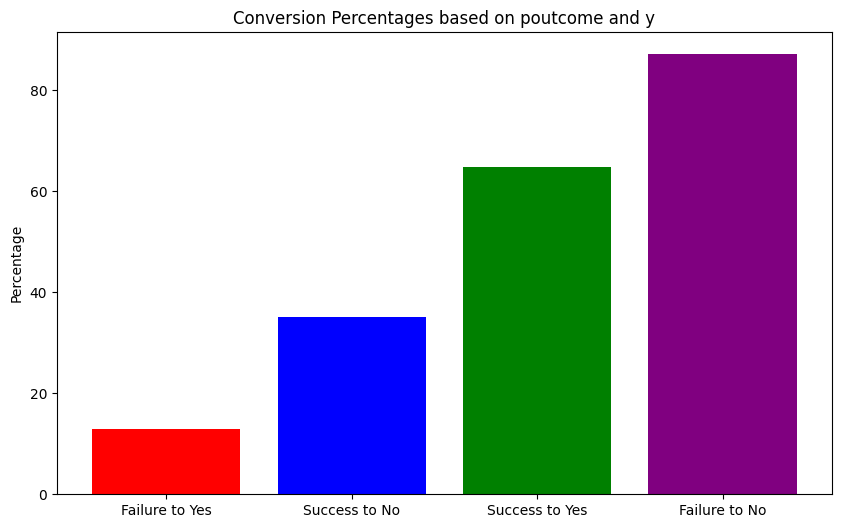

In [76]:
count_failure_yes = df[(df['poutcome'] == 'failure') & (df['y'] == 'yes')].shape[0]
count_success_no = df[(df['poutcome'] == 'success') & (df['y'] == 'no')].shape[0]
count_success_yes = df[(df['poutcome'] == 'success') & (df['y'] == 'yes')].shape[0]
count_failure_no = df[(df['poutcome'] == 'failure') & (df['y'] == 'no')].shape[0]

# Total counts for 'poutcome' values
total_failure = df[df['poutcome'] == 'failure'].shape[0]
total_success = df[df['poutcome'] == 'success'].shape[0]

# Calculate the percentages
percentage_failure_yes = (count_failure_yes / total_failure) * 100
percentage_success_no = (count_success_no / total_success) * 100
percentage_success_yes = (count_success_yes / total_success) * 100
percentage_failure_no = (count_failure_no / total_failure) * 100

# Plotting the results
labels = ['Failure to Yes', 'Success to No', 'Success to Yes', 'Failure to No']
percentages = [percentage_failure_yes, percentage_success_no, percentage_success_yes, percentage_failure_no]

plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color=['red', 'blue', 'green', 'purple'])
plt.title('Conversion Percentages based on poutcome and y')
plt.ylabel('Percentage')
plt.show()

Counts in each age group:
0-30      10901
31-40     34894
41-50     22098
51-60     15218
61-100     2962
Name: age_group, dtype: int64

Responses within each age group:
  age_group    y  count
0      0-30   no   9071
1      0-30  yes   1830
2     31-40   no  31325
3     31-40  yes   3569
4     41-50   no  20241
5     41-50  yes   1857
6     51-60   no  13764
7     51-60  yes   1454
8    61-100   no   1898
9    61-100  yes   1064


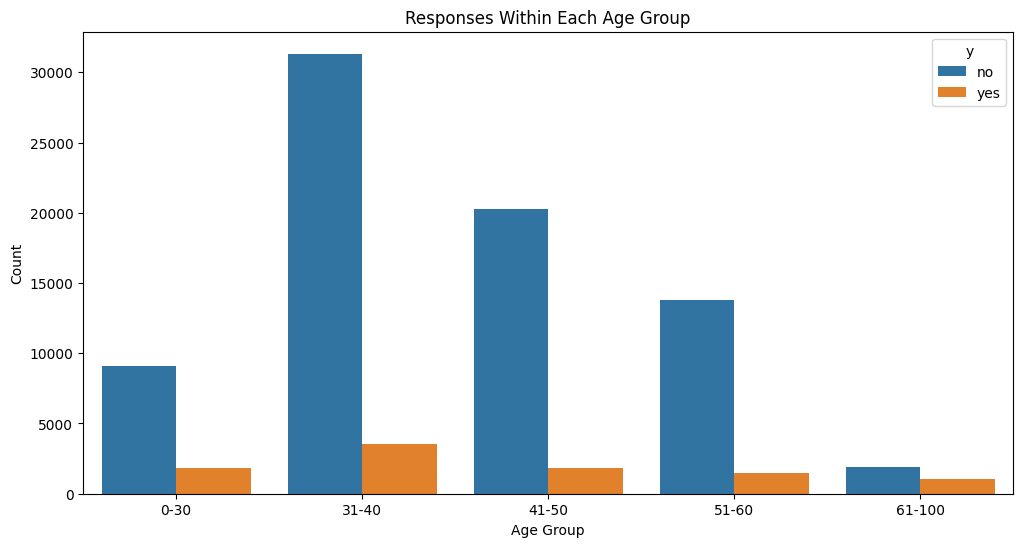

In [77]:
# Define age bins
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-100']

# Create a new column 'age_group' based on age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts in each age group
age_group_counts = df['age_group'].value_counts().sort_index()
print("Counts in each age group:")
print(age_group_counts)

# Analyze responses within each age group
grouped_counts_age = df.groupby(['age_group', 'y']).size().reset_index(name='count')
print("\nResponses within each age group:")
print(grouped_counts_age)

# Plot responses within each age group
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='count', hue='y', data=grouped_counts_age)
plt.title('Responses Within Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


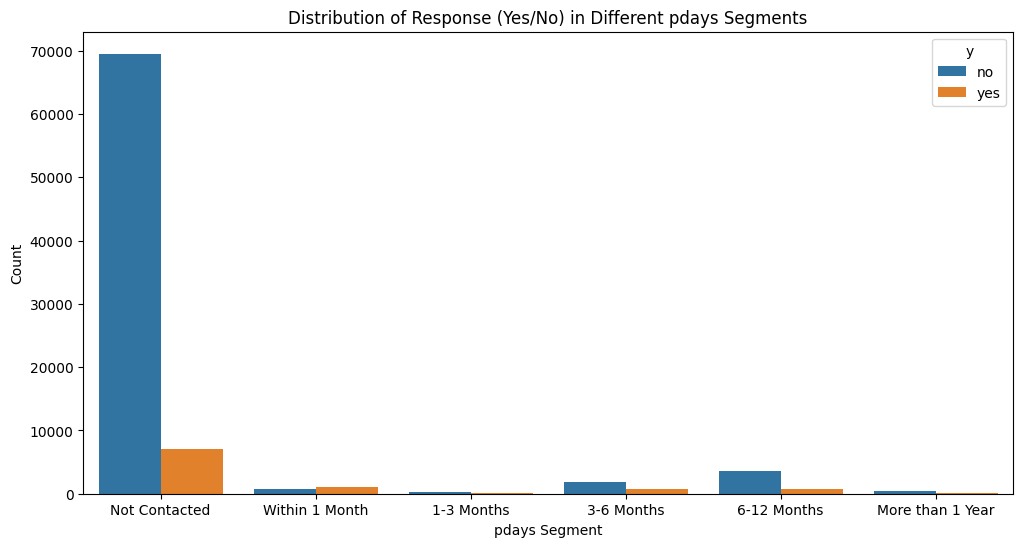

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Define bins for 'pdays'
bins = [-1, 0, 30, 90, 180, 365, float('inf')]
labels = ['Not Contacted', 'Within 1 Month', '1-3 Months', '3-6 Months', '6-12 Months', 'More than 1 Year']

# Create a new column 'pdays_segment' based on the bins
df['pdays_segment'] = pd.cut(df['pdays'], bins=bins, labels=labels, right=False)

# Create a bar plot for 'pdays_segment' and response ('y')
plt.figure(figsize=(12, 6))
sns.countplot(x='pdays_segment', hue='y', data=df, order=labels)
plt.title('Distribution of Response (Yes/No) in Different pdays Segments')
plt.xlabel('pdays Segment')
plt.ylabel('Count')
plt.show()

    campaign    y  count
0          1   no  30238
1          1  yes   4783
2          2   no  20432
3          2  yes   2571
4          3   no   9655
..       ...  ...    ...
56        34   no      8
57        35   no      9
58        36   no      4
59        37   no      3
60        38   no      3

[61 rows x 3 columns]


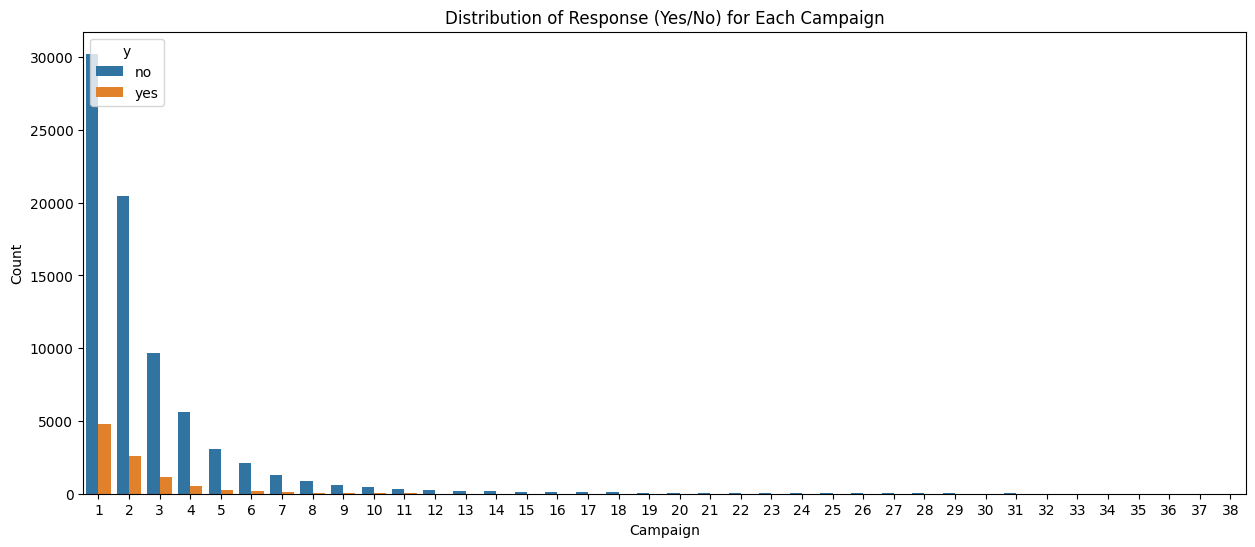

In [79]:
campaign_response_counts = df.groupby(['campaign', 'y']).size().reset_index(name='count')
print(campaign_response_counts)
plt.figure(figsize=(15, 6))
sns.barplot(x='campaign', y='count', hue='y', data=campaign_response_counts)
plt.title('Distribution of Response (Yes/No) for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()

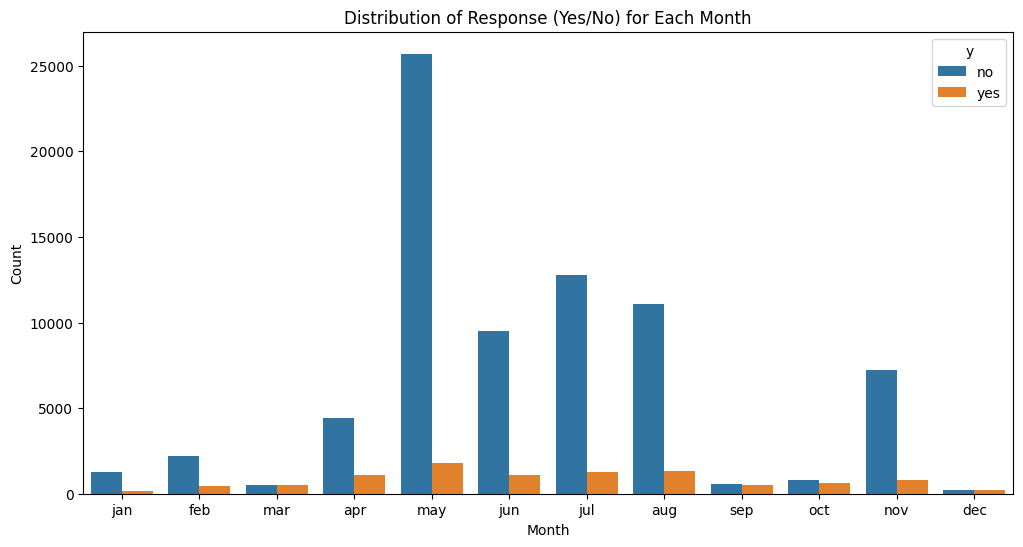

In [80]:
# Group by 'month' and calculate the count of 'yes' and 'no' responses
month_response_counts = df.groupby(['month', 'y']).size().reset_index(name='count')

# Create a bar plot for 'month' and response ('y')
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', hue='y', data=month_response_counts, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Distribution of Response (Yes/No) for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [81]:
print(month_response_counts)

   month    y  count
0    apr   no   4442
1    apr  yes   1107
2    aug   no  11057
3    aug  yes   1310
4    dec   no    206
5    dec  yes    189
6    feb   no   2206
7    feb  yes    431
8    jan   no   1257
9    jan  yes    138
10   jul   no  12769
11   jul  yes   1243
12   jun   no   9532
13   jun  yes   1090
14   mar   no    493
15   mar  yes    518
16   may   no  25704
17   may  yes   1803
18   nov   no   7242
19   nov  yes    813
20   oct   no    797
21   oct  yes    624
22   sep   no    594
23   sep  yes    508


In [82]:
# Pivot the data to have 'yes' and 'no' as columns
response_pivot = month_response_counts.pivot(index='month', columns='y', values='count').fillna(0)

# Calculate the response rate for each month
response_pivot['response_rate'] = response_pivot['yes'] / (response_pivot['yes'] + response_pivot['no'])

# Display the result
print(response_pivot[['yes', 'no', 'response_rate']])

y       yes     no  response_rate
month                            
apr    1107   4442       0.199495
aug    1310  11057       0.105927
dec     189    206       0.478481
feb     431   2206       0.163443
jan     138   1257       0.098925
jul    1243  12769       0.088710
jun    1090   9532       0.102617
mar     518    493       0.512364
may    1803  25704       0.065547
nov     813   7242       0.100931
oct     624    797       0.439127
sep     508    594       0.460980


In [83]:
# Filter the DataFrame for campaigns in March with 'yes' response
march_yes_campaigns = df[(df['month'] == 'mar') & (df['y'] == 'yes')]

# Calculate the average duration
average_duration_march_yes = march_yes_campaigns['duration'].mean()

# Display the result
print(f"Average duration of campaigns in March with 'yes' response: {average_duration_march_yes:.2f} seconds")


Average duration of campaigns in March with 'yes' response: 288.20 seconds


In [84]:
# Filter the DataFrame for campaigns in March with 'yes' response
march_yes_campaigns = df[(df['month'] == 'dec') & (df['y'] == 'yes')]

# Calculate the average duration
average_duration_march_yes = march_yes_campaigns['duration'].mean()

# Display the result
print(f"Average duration of campaigns in December with 'yes' response: {average_duration_march_yes:.2f} seconds")


Average duration of campaigns in December with 'yes' response: 417.39 seconds


In [85]:
# Filter data for December
december_data = df[df['month'] == 'dec']

# Count the number of previous campaigns for 'yes' and 'no'
count_previous_yes = december_data[december_data['y'] == 'yes']['campaign'].sum()
count_previous_no = december_data[december_data['y'] == 'no']['campaign'].sum()

print(f"Number of previous campaigns in December with response 'yes': {count_previous_yes}")
print(f"Number of previous campaigns in December with response 'no': {count_previous_no}")


Number of previous campaigns in December with response 'yes': 391
Number of previous campaigns in December with response 'no': 467
